In [1]:
import h2o
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,1 day 14 hours 6 mins
H2O cluster version:,3.13.0.3978
H2O cluster version age:,4 years and 9 days !!!
H2O cluster name:,H2O_started_from_R_Sandipan.Dey_kpl973
H2O cluster total nodes:,1
H2O cluster free memory:,2.541 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [3]:
#Select project 1
df_load = pd.read_csv('http://coursera.h2o.ai/cacao.882.csv')
df = h2o.H2OFrame(df_load)
df.head()

AttributeError: 'DataFrame' object has no attribute 'as_matrix'

In [5]:
train, valid, test = df.split_frame(
    ratios = [0.7,0.15],
    destination_frames = ["df_train","df_valid","df_test"],
    seed  =1234)

In [6]:
print("%d/%d/%d", (train.nrows, valid.nrows, test.nrows))

%d/%d/%d (1257, 273, 265)


In [7]:
y = "Rating"
ignoreFields = [y]
x = [i for i in train.names if i not in ignoreFields]

In [8]:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
m1 = H2ODeepLearningEstimator()
m1.train(x,y, train, validation_frame = valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [9]:
m1

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1626834878593_1


Status of Neuron Layers: predicting Rating, regression, gaussian distribution, Quadratic loss, 382,601 weights/biases, 4.4 MB, 12,570 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,1710,Input,0.0,,,,,,,,,
1,,2,200,Rectifier,0.0,0.0,0.0,0.264652,0.405846,0.0,-0.000011,0.031487,0.408104,0.095797
2,,3,200,Rectifier,0.0,0.0,0.0,0.020546,0.062862,0.0,-0.00366,0.069592,0.992941,0.007906
3,,4,1,Linear,,0.0,0.0,0.000292,0.000743,0.0,0.01461,0.094467,-0.001077,0.0




ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 0.20154332252456647
RMSE: 0.4489357665909083
MAE: 0.35115713034518486
RMSLE: 0.11577693124732356
Mean Residual Deviance: 0.20154332252456647

ModelMetricsRegression: deeplearning
** Reported on validation data. **

MSE: 0.2289776439410272
RMSE: 0.4785160853524437
MAE: 0.3747692565300123
RMSLE: 0.12441326841484769
Mean Residual Deviance: 0.2289776439410272

Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2,validation_rmse,validation_deviance,validation_mae,validation_r2
0,,2021-07-21 09:40:54,0.000 sec,None,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2021-07-21 09:40:54,1.053 sec,2850 obs/sec,1.0,1,1257.0,0.448936,0.201543,0.351157,0.105596,0.478516,0.228978,0.374769,0.070799
2,,2021-07-21 09:40:57,4.184 sec,3915 obs/sec,10.0,10,12570.0,0.371019,0.137655,0.294945,0.389117,0.500970,0.250971,0.395477,-0.018449
3,,2021-07-21 09:40:58,4.494 sec,3877 obs/sec,10.0,10,12570.0,0.448936,0.201543,0.351157,0.105596,0.478516,0.228978,0.374769,0.070799



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Maker.Breeze Mill,1.000000,1.000000,0.000669
1,Bean Origin.Papua New Guinea,0.998799,0.998799,0.000668
2,"Origin.Loma Sotavento, 2013",0.984228,0.984228,0.000658
3,Maker.SRSLY,0.980159,0.980159,0.000656
4,"Origin.Los Rios, Hacienda Limon, Orecao, 2014",0.979114,0.979114,0.000655
5,Origin.Cuyagua Village,0.975542,0.975542,0.000652
6,Cocoa Percent.60%,0.973967,0.973967,0.000651
7,Origin.Mekong Delta & Dong Nai,0.973732,0.973732,0.000651
8,"Origin.Fazenda Sempre Firme, Bahia",0.972390,0.972390,0.000650
9,Bean Type.Forastero (Arriba) ASSS,0.971839,0.971839,0.000650



See the whole table with table.as_data_frame()


In [10]:
#Model performance on testing data
m1.model_performance(test)


ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 0.20471365291400717
RMSE: 0.4524529289484235
MAE: 0.37204478859913054
RMSLE: 0.11157247480558148
Mean Residual Deviance: 0.20471365291400717


In [14]:
m2 = H2ODeepLearningEstimator(epochs = 200, stopping_rounds = 5,
                             stopping_tolerance = 0, hidden = [400, 400],stopping_metric = 'rmse'
                               
                             )
m2.train(x,y, train, validation_frame = valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [15]:
m2

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1626834878593_3


Status of Neuron Layers: predicting Rating, regression, gaussian distribution, Quadratic loss, 845,201 weights/biases, 9.7 MB, 251,400 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,1710,Input,0.0,,,,,,,,,
1,,2,400,Rectifier,0.0,0.0,0.0,0.246629,0.40425,0.0,0.000191,0.040983,0.103838,0.168275
2,,3,400,Rectifier,0.0,0.0,0.0,0.164071,0.214741,0.0,-0.019447,0.056885,0.921588,0.024157
3,,4,1,Linear,,0.0,0.0,0.003352,0.001741,0.0,0.000623,0.066957,0.022043,0.0




ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 0.00577188954229769
RMSE: 0.07597295270224588
MAE: 0.054381819706338874
RMSLE: 0.019225801326371483
Mean Residual Deviance: 0.00577188954229769

ModelMetricsRegression: deeplearning
** Reported on validation data. **

MSE: 0.20360020523360223
RMSE: 0.4512207943275689
MAE: 0.3524029702813601
RMSLE: 0.11733578927365597
Mean Residual Deviance: 0.20360020523360223

Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2,validation_rmse,validation_deviance,validation_mae,validation_r2
0,,2021-07-21 09:49:39,0.000 sec,None,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2021-07-21 09:49:44,5.872 sec,2520 obs/sec,10.0,1,12570.0,0.387348,0.150038,0.303670,0.334165,0.470339,0.221218,0.376140,0.102286
2,,2021-07-21 09:49:57,19.976 sec,2148 obs/sec,30.0,3,37710.0,0.186722,0.034865,0.135476,0.845277,0.461950,0.213398,0.359870,0.134023
3,,2021-07-21 09:50:15,38.065 sec,2190 obs/sec,60.0,6,75420.0,0.075973,0.005772,0.054382,0.974386,0.451221,0.203600,0.352403,0.173782
4,,2021-07-21 09:50:33,55.364 sec,2239 obs/sec,90.0,9,113130.0,0.049040,0.002405,0.034591,0.989328,0.452488,0.204746,0.352588,0.169133
5,,2021-07-21 09:50:49,1 min 12.208 sec,2282 obs/sec,120.0,12,150840.0,0.043915,0.001929,0.032172,0.991442,0.453577,0.205732,0.353453,0.165129
6,,2021-07-21 09:51:06,1 min 29.278 sec,2304 obs/sec,150.0,15,188550.0,0.036502,0.001332,0.027289,0.994087,0.452885,0.205105,0.352658,0.167676
7,,2021-07-21 09:51:23,1 min 45.678 sec,2333 obs/sec,180.0,18,226260.0,0.026665,0.000711,0.019806,0.996845,0.453782,0.205918,0.355550,0.164377
8,,2021-07-21 09:51:34,1 min 56.896 sec,2352 obs/sec,200.0,20,251400.0,0.024151,0.000583,0.018239,0.997411,0.457358,0.209176,0.357605,0.151153
9,,2021-07-21 09:51:36,1 min 58.064 sec,2350 obs/sec,200.0,20,251400.0,0.075973,0.005772,0.054382,0.974386,0.451221,0.203600,0.352403,0.173782



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Cocoa Percent.60%,1.000000,1.000000,0.002049
1,Cocoa Percent.71%,0.748224,0.748224,0.001533
2,Cocoa Percent.55%,0.714881,0.714881,0.001465
3,Cocoa Percent.100%,0.707879,0.707879,0.001451
4,Origin.Ecuador,0.703795,0.703795,0.001442
5,Origin.La Red,0.695296,0.695296,0.001425
6,Origin.Madagascar,0.684956,0.684956,0.001404
7,Origin.Papua New Guinea,0.665416,0.665416,0.001364
8,Cocoa Percent.63%,0.663278,0.663278,0.001359
9,Maker.Just Good Chocolate,0.658668,0.658668,0.001350



See the whole table with table.as_data_frame()


In [16]:
m2.model_performance(test)


ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 0.1965551630568907
RMSE: 0.44334542182917674
MAE: 0.36179826856878106
RMSLE: 0.10840499299040145
Mean Residual Deviance: 0.1965551630568907


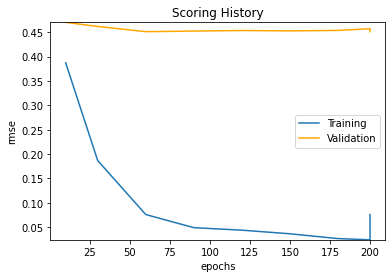

In [18]:
#Using RMSE as metric, we found that m2 model is slightly better than m1 model
m2.plot()

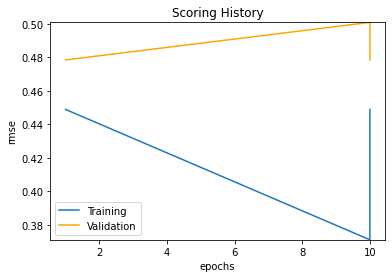

In [19]:
m1.plot()

In [20]:
m2.scoring_history()

,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2,validation_rmse,validation_deviance,validation_mae,validation_r2
0,,2021-07-21 09:49:39,0.000 sec,None,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2021-07-21 09:49:44,5.872 sec,2520 obs/sec,10.0,1,12570.0,0.387348,0.150038,0.303670,0.334165,0.470339,0.221218,0.376140,0.102286
2,,2021-07-21 09:49:57,19.976 sec,2148 obs/sec,30.0,3,37710.0,0.186722,0.034865,0.135476,0.845277,0.461950,0.213398,0.359870,0.134023
3,,2021-07-21 09:50:15,38.065 sec,2190 obs/sec,60.0,6,75420.0,0.075973,0.005772,0.054382,0.974386,0.451221,0.203600,0.352403,0.173782
4,,2021-07-21 09:50:33,55.364 sec,2239 obs/sec,90.0,9,113130.0,0.049040,0.002405,0.034591,0.989328,0.452488,0.204746,0.352588,0.169133
5,,2021-07-21 09:50:49,1 min 12.208 sec,2282 obs/sec,120.0,12,150840.0,0.043915,0.001929,0.032172,0.991442,0.453577,0.205732,0.353453,0.165129
6,,2021-07-21 09:51:06,1 min 29.278 sec,2304 obs/sec,150.0,15,188550.0,0.036502,0.001332,0.027289,0.994087,0.452885,0.205105,0.352658,0.167676
7,,2021-07-21 09:51:23,1 min 45.678 sec,2333 obs/sec,180.0,18,226260.0,0.026665,0.000711,0.019806,0.996845,0.453782,0.205918,0.355550,0.164377
8,,2021-07-21 09:51:34,1 min 56.896 sec,2352 obs/sec,200.0,20,251400.0,0.024151,0.000583,0.018239,0.997411,0.457358,0.209176,0.357605,0.151153
9,,2021-07-21 09:51:36,1 min 58.064 sec,2350 obs/sec,200.0,20,251400.0,0.075973,0.005772,0.054382,0.974386,0.451221,0.203600,0.352403,0.173782


In [24]:
# save the model
model_path = h2o.save_model(model=m1, path=r"C:\Data\JupyterNotebooks\models", force=True)
print(model_path)

C:\Data\JupyterNotebooks\models\DeepLearning_model_python_1626834878593_1


In [25]:
model_path2 = h2o.save_model(model=m2, path=r"C:\Data\JupyterNotebooks\models", force=True)
print(model_path2)

C:\Data\JupyterNotebooks\models\DeepLearning_model_python_1626834878593_3


In [27]:
# load the model
saved_model = h2o.load_model(model_path)
saved_model2 = h2o.load_model(model_path2)
